In [1]:
import os
import torch
from networks.CNN_network import Generator, Discriminator
import matplotlib.pyplot as plt
from utils.utils import denorm
from utils.data_loader import Data_Loader
from torchvision.utils import make_grid

# CIFAR10

In [2]:
save_path = './output/'
dataset = 'mnist_cutout'
image_path = '/media/v/data/MNIST/'

imsize = 28
channel = 1
d_num = 9
pretrained_model = 300000

# STL-10

In [3]:
# save_path = './output/'
# dataset = 'stl10'
# image_path = '~/Datasets/STL-10/'

# imsize = 64
# channel = 3
# d_num = 9
# pretrained_model = 200000

In [4]:
model_save_path = save_path + '/models'
sample_save_path = save_path + '/samples'

z_dim = 64
d_conv_dim = 64
g_conv_dim = 64
samples_num = 64

In [5]:
# real_images
data_loader = Data_Loader(dataset = dataset, image_path = image_path, image_size = imsize, batch_size = samples_num, shuf = True)
data_iter = iter(data_loader.loader())
real_images, _ = next(data_iter)
real_images = real_images.cuda()

fake_images:


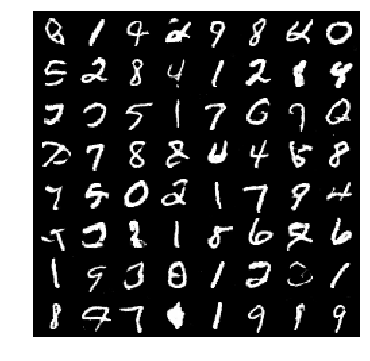

real_images:


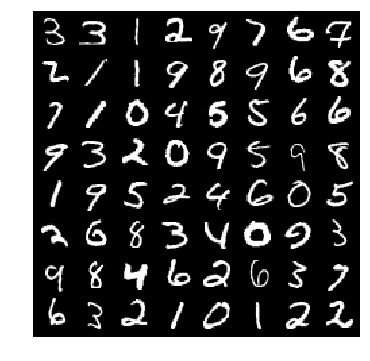

In [29]:
# pick first 64 to show

# fake_images
z = torch.randn(samples_num, z_dim).cuda()
G = Generator(imsize, z_dim, channel, g_conv_dim).cuda()
G.load_state_dict(torch.load(os.path.join(model_save_path, 'G_step{}.pth'.format(pretrained_model))))
fake_images = G(z)

fake_images_show = fake_images[:64].cpu()
grid_fake = make_grid(denorm(fake_images_show), 8)
fake_images_ndarr = grid_fake.mul(255).clamp(0, 255).byte().permute(1, 2, 0).numpy()
plt.figure(figsize = (6,6))
plt.axis('off')
print("fake_images:")
plt.imshow(fake_images_ndarr)
plt.show()

real_images_show = real_images[:64].cpu()
grid_real = make_grid(denorm(real_images_show), 8)
real_images_ndarr = grid_real.mul(255).clamp(0, 255).byte().permute(1, 2, 0).numpy()
plt.figure(figsize = (6,6))
plt.axis('off')
plt.imshow(real_images_ndarr)
print("real_images:")
plt.show()


In [7]:
# from torchvision.utils import save_image
# save_image(denorm(fake_images_show), os.path.join(sample_save_path, 'real.png'))

In [8]:
# # different D value (at most 2K samples with 1080Ti)

# for i in range(d_num):
#     locals()['D_' + str(i)] = Discriminator(imsize, channel, d_conv_dim).cuda()
# for i in range(d_num):
#     locals()['D_' + str(i)].load_state_dict(torch.load(os.path.join(model_save_path, 'D{}_step{}.pth'.format(i, pretrained_model))))
    
# D_result_real = torch.empty(d_num, samples_num).cuda()
# D_result_fake = torch.empty(d_num, samples_num).cuda()
# for i in range(d_num):
#     D_result_real[i] = locals()['D_' + str(i)](real_images)
#     D_result_fake[i] = locals()['D_' + str(i)](fake_images)
# max_label_real = torch.argmax(D_result_real, dim=0)
# max_label_fake = torch.argmax(D_result_fake, dim=0)

# import numpy as np
# bins = np.linspace(-1, d_num, 20)

# plt.hist(max_label_real.cpu().numpy(), bins, alpha=0.5, label='real_images')
# plt.hist(max_label_fake.cpu().numpy(), bins, alpha=0.5, label='fake_images')
# plt.title("Histogram with 9 discriminators of 2000 samples")
# plt.legend(loc='upper right')
# plt.show()

In [9]:
# # pick some samples to show D value

# show_num = 14

# real_images_with_D = real_images[:show_num].cpu()
# grid_real_with_D = make_grid(denorm(real_images_with_D), show_num)
# real_images_with_D_ndarr = grid_real_with_D.mul(255).clamp(0, 255).byte().permute(1, 2, 0).numpy()
# plt.figure(figsize = (show_num+3,show_num+3))
# plt.axis('off')
# plt.imshow(real_images_with_D_ndarr)
# print("real_images:")
# print('\tD_%s' % '\tD_'.join(map(str, max_label_real[:show_num].cpu().numpy())))
# plt.show()

# fake_images_with_D = fake_images[:show_num].cpu()
# grid_fake_with_D = make_grid(denorm(fake_images_with_D), show_num)
# fake_images_with_D_ndarr = grid_fake_with_D.mul(255).clamp(0, 255).byte().permute(1, 2, 0).numpy()
# plt.figure(figsize = (show_num+3,show_num+3))
# plt.axis('off')
# print("fake_images:")
# print('\tD_%s' % '\tD_'.join(map(str, max_label_fake[:show_num].cpu().numpy())))
# plt.imshow(fake_images_with_D_ndarr)
# plt.show()